## DATA PREPROCESSING ##

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import statsmodels.api as sm

In [46]:
df = pd.read_csv('C:/Users/sagar/Downloads/NFLX.csv')

### DATA SET ###

In [47]:
df

,Date,Closing Price,Volume,Open Price,Closing Price 1 Day Ago,High Price,Low Price
0,10-04-2023,338.99,2650954,335.27,339.33,339.88,333.3600
1,06-04-2023,339.33,4660542,339.34,342.35,340.48,332.6300
2,05-04-2023,342.35,4205545,345.30,346.75,345.43,336.2526
3,04-04-2023,346.75,3298072,348.49,348.28,349.80,343.9500
4,03-04-2023,348.28,4413650,341.83,345.48,348.58,340.4001
...,...,...,...,...,...,...,...
764,26-03-2020,362.99,7235016,344.00,342.39,363.84,341.7300
765,25-03-2020,342.39,8767171,361.02,357.32,362.00,339.1700
766,24-03-2020,357.32,11638683,369.99,360.27,372.93,353.0301
767,23-03-2020,360.27,13449378,347.89,332.83,366.11,340.8838


In [48]:
df.shape

(769, 7)

In [49]:
df.dtypes

Date                        object
Closing Price              float64
Volume                       int64
Open Price                 float64
Closing Price 1 Day Ago    float64
High Price                 float64
Low Price                  float64
dtype: object

### DATA VISUALIZATION ###

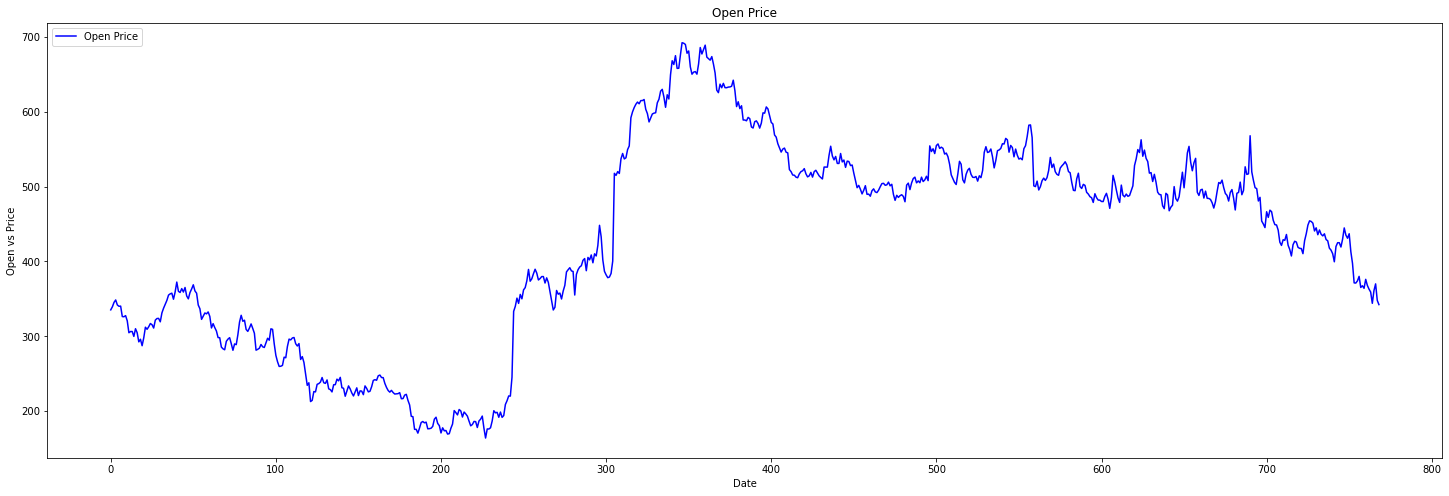

In [52]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price")
plt.plot(df['Open Price'], color='Blue', linestyle='solid',  label = 'Open Price')
plt.xlabel("Date")
plt.ylabel("Open vs Price")
plt.legend(loc="upper left")
plt.show()


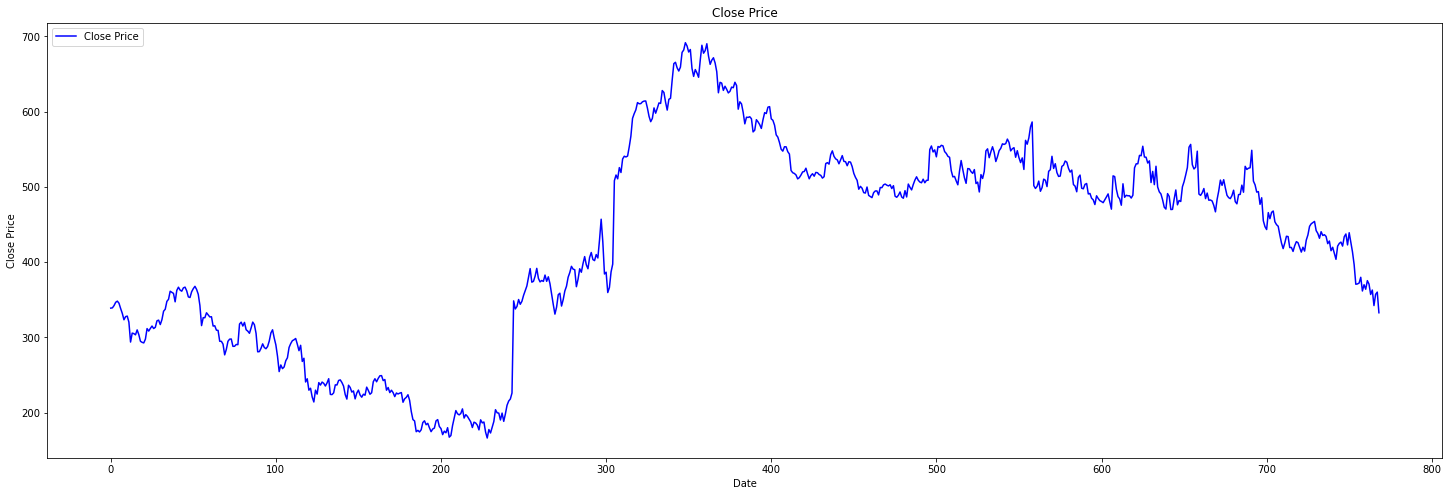

In [29]:
plt.subplots(figsize=(25, 8))
plt.title("Close Price")
plt.plot(df['Closing Price'], color='Blue', linestyle='solid',  label = 'Close Price')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc="upper left")
plt.show()


### COMPARISON BETWEEN OPEN PRICE vs CLOSE PRICE ###

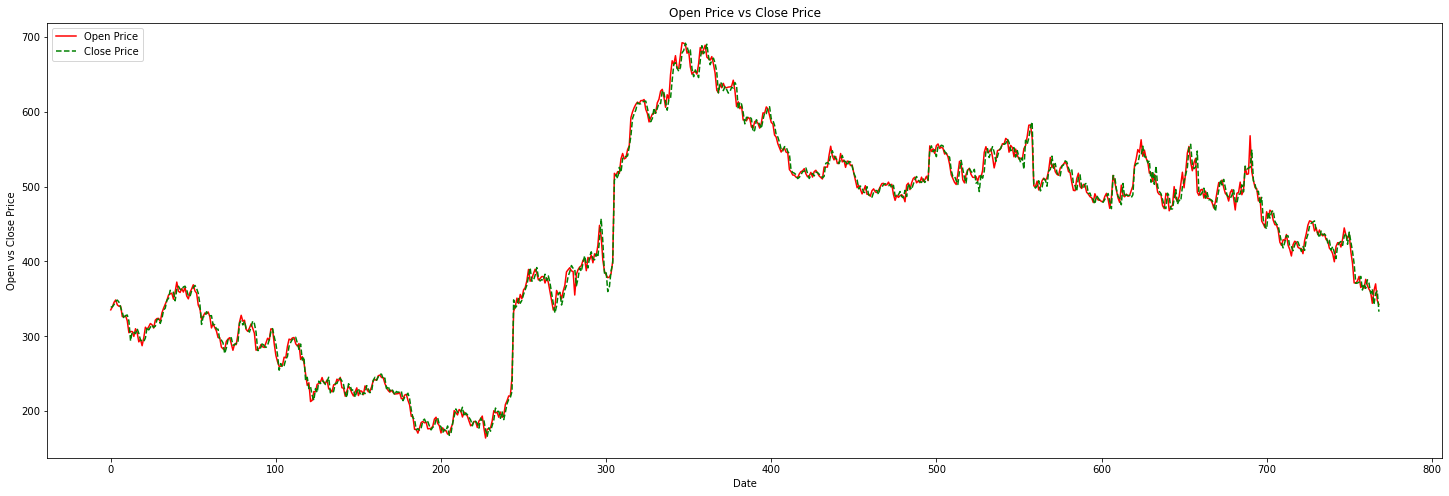

In [30]:
plt.subplots(figsize=(25, 8))
plt.title("Open Price vs Close Price")
plt.plot(df['Open Price'], color='red', linestyle='solid',  label = 'Open Price')
plt.plot(df['Closing Price'], color='green', linestyle='dashed',  label = 'Close Price')
plt.xlabel("Date")
plt.ylabel("Open vs Close Price")
plt.legend(loc="upper left")
plt.show()


### COMPARISON BETWEEN CLOSING PRICE AND CLOSING PRICE 1 DAY AGO ###

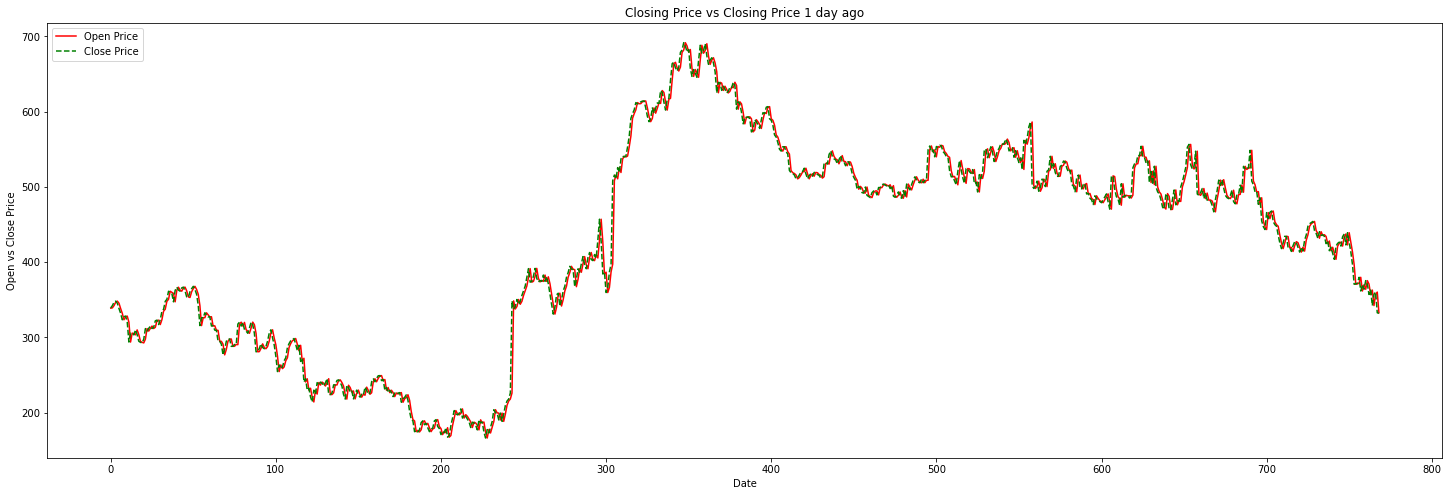

In [31]:
plt.subplots(figsize=(25, 8))
plt.title("Closing Price vs Closing Price 1 day ago")
plt.plot(df['Closing Price'], color='red', linestyle='solid',  label = 'Open Price')
plt.plot(df['Closing Price 1 Day Ago'], color='green', linestyle='dashed',  label = 'Close Price')
plt.xlabel("Date")
plt.ylabel("Open vs Close Price")
plt.legend(loc="upper left")
plt.show()


### VOLUME OF TRADES ###

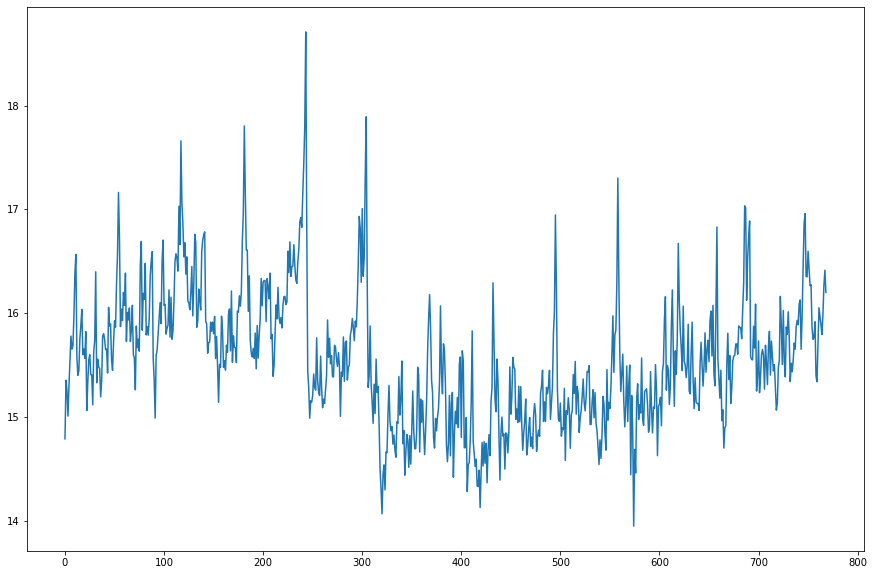

In [39]:
plt.figure(figsize=(15,10))
ts_log=np.log(df['Volume'])
plt.plot(ts_log)

### STATIONARITY TEST ###

#### A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time. In other words, stationarity in Time Series also means series without a Trend or Seasonal components. ####

In [33]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()
    
    #Plot rolling statistics 

    plt.figure(figsize=(15,10))
    orig = plt.plot(timeseries, color='pink',label ='Original') 
    mean = plt.plot(MA, color='b', label ='Rolling Mean') 
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller (timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']) 
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

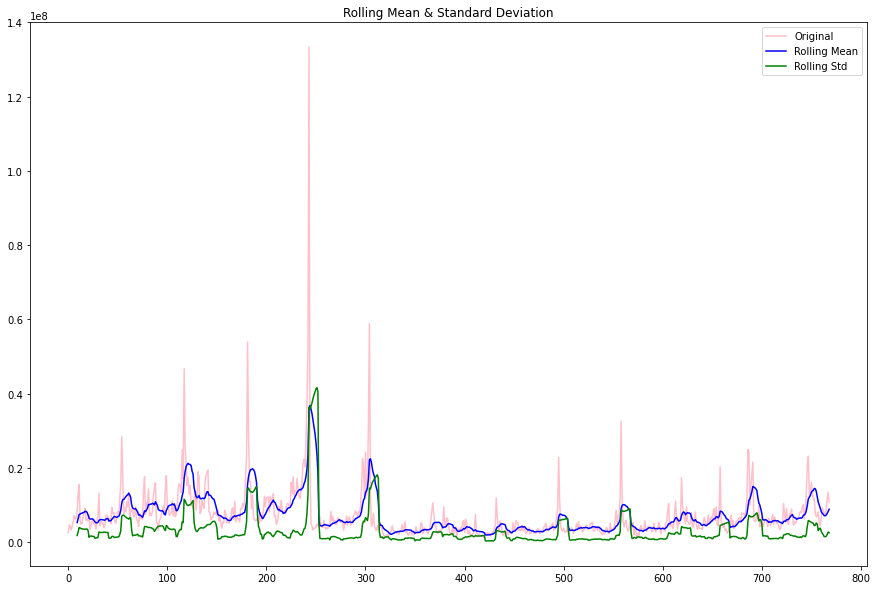

Results of Dickey-Fuller Test:
Test Statistic                -8.492112e+00
p-value                        1.304990e-13
#Lags Used                     3.000000e+00
Number of Observations Used    7.650000e+02
Critical Value (1%)           -3.438927e+00
Critical Value (5%)           -2.865325e+00
Critical Value (10%)          -2.568786e+00
dtype: float64


In [34]:
test_stationarity(df['Volume'])

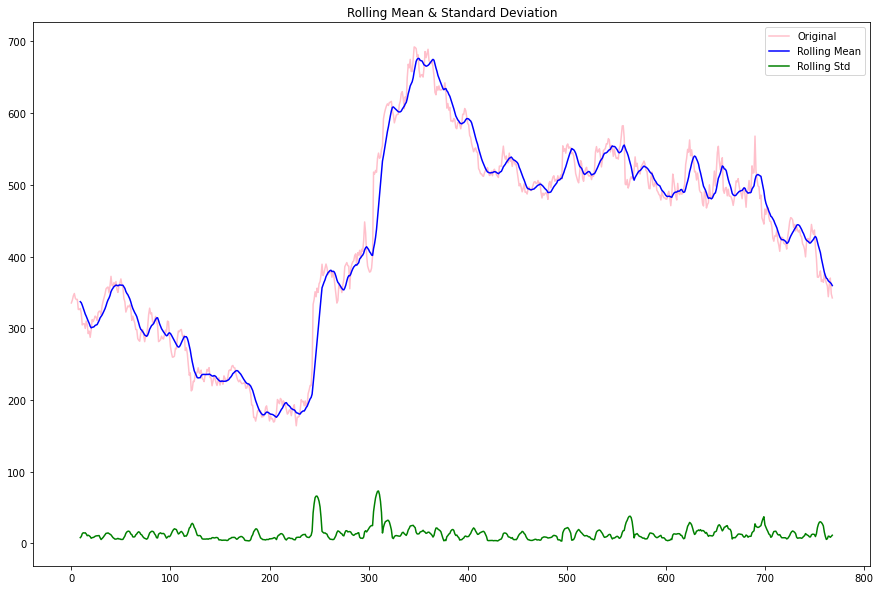

Results of Dickey-Fuller Test:
Test Statistic                  -1.262396
p-value                          0.646196
#Lags Used                       1.000000
Number of Observations Used    767.000000
Critical Value (1%)             -3.438905
Critical Value (5%)             -2.865316
Critical Value (10%)            -2.568781
dtype: float64


In [35]:
test_stationarity(df['Open Price'])

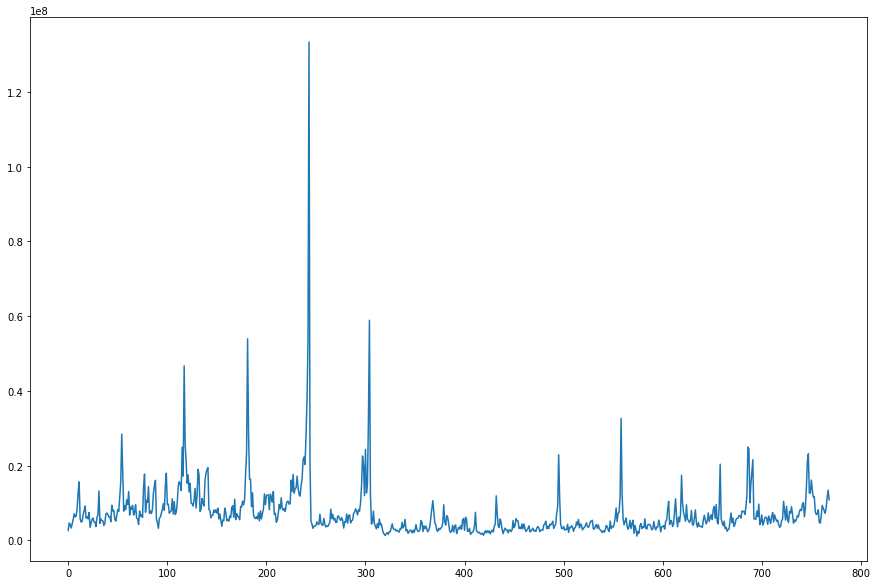

In [41]:
plt.figure (figsize=(15,10))
plt.plot (df['Volume'])

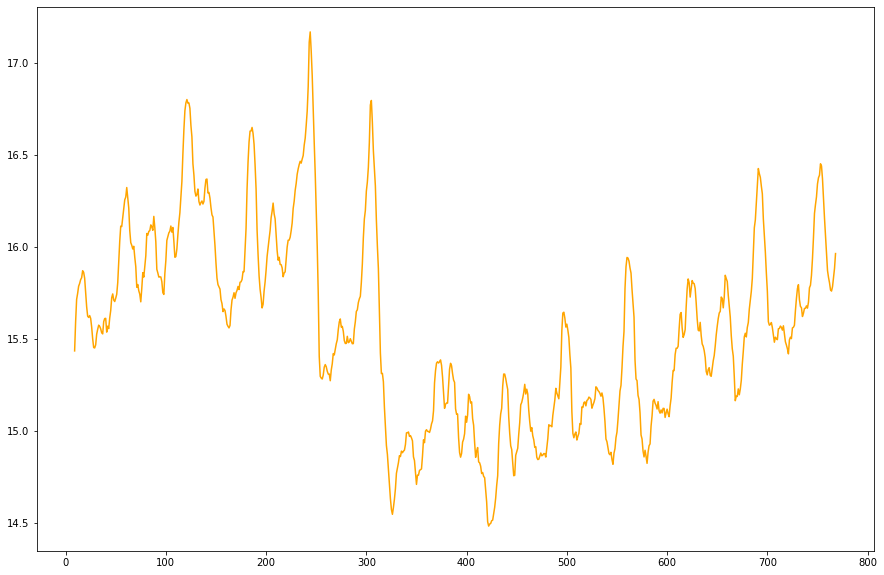

In [37]:
plt.figure(figsize=(15,10))
moving_average=ts_log.rolling(window = 10).mean()
plt.plot(moving_average, color='orange')

In [13]:
moving_avg_diff = ts_log=moving_average
moving_avg_diff

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
764    15.758961
765    15.782782
766    15.832963
767    15.882639
768    15.962971
Name: Volume, Length: 769, dtype: float64

### test_stationarity(moving_avg_diff) ###

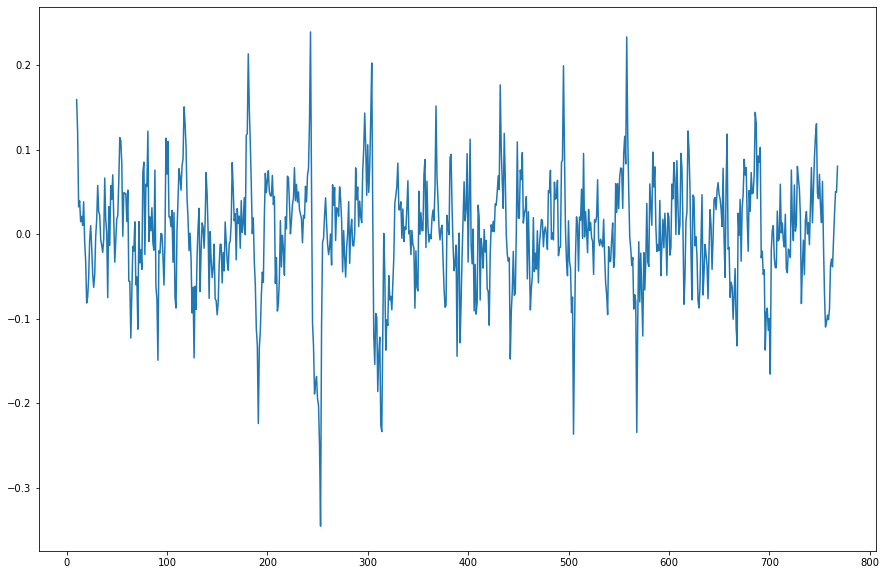

In [15]:
plt.figure(figsize=(15,10))
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

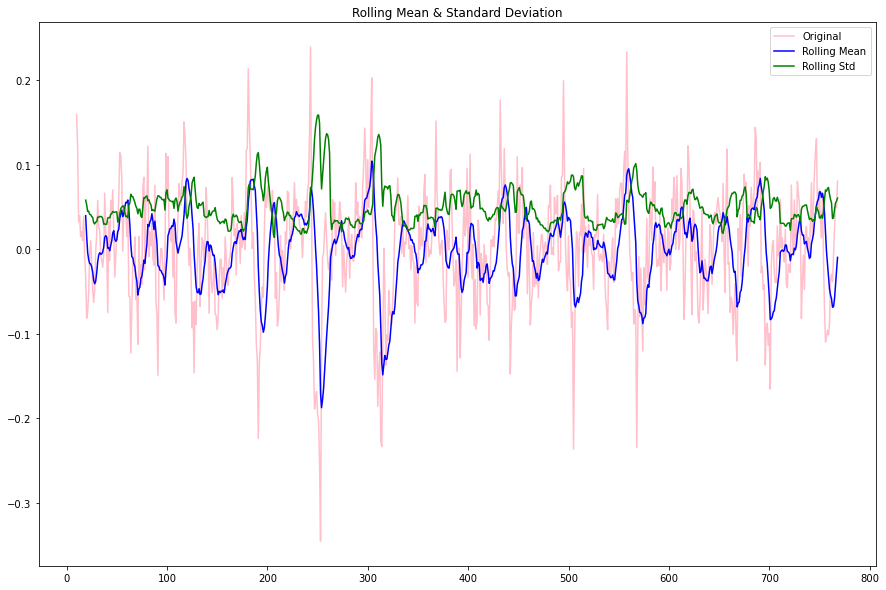

Results of Dickey-Fuller Test:
Test Statistic                -7.180846e+00
p-value                        2.652412e-10
#Lags Used                     2.000000e+01
Number of Observations Used    7.380000e+02
Critical Value (1%)           -3.439242e+00
Critical Value (5%)           -2.865464e+00
Critical Value (10%)          -2.568860e+00
dtype: float64


In [16]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

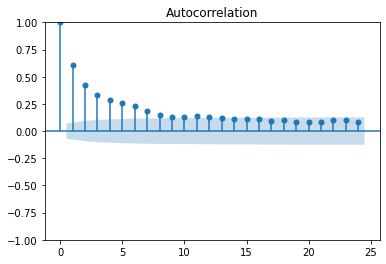

<Figure size 2160x1440 with 0 Axes>

In [17]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(df['Volume'],lags=24)
plt.figure(figsize=(30,20))
plt.show()

C:\Users\sagar\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


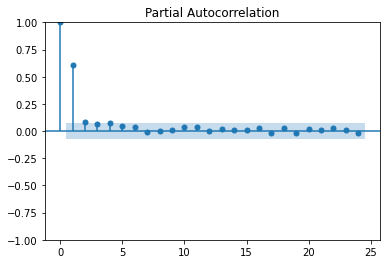

<Figure size 2160x1440 with 0 Axes>

In [18]:
tsaplots.plot_pacf(df['Volume'],lags=24)
plt.figure(figsize=(30,20))
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                  769
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -13058.018
Date:                Sun, 07 May 2023   AIC                          26124.036
Time:                        15:04:56   BIC                          26142.611
Sample:                             0   HQIC                         26131.185
                                - 769                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6190      0.046     13.604      0.000       0.530       0.708
ma.L1         -1.0786      0.047    -23.165      0.000      -1.170      -0.987
ma.L2          0.0978      0.036      2.752      0.0

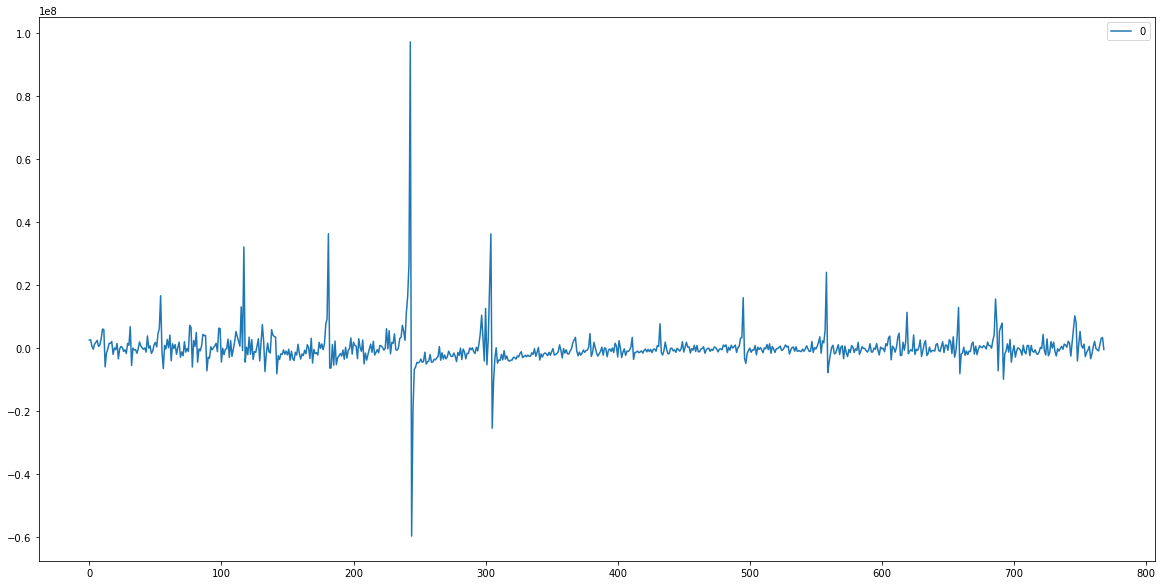

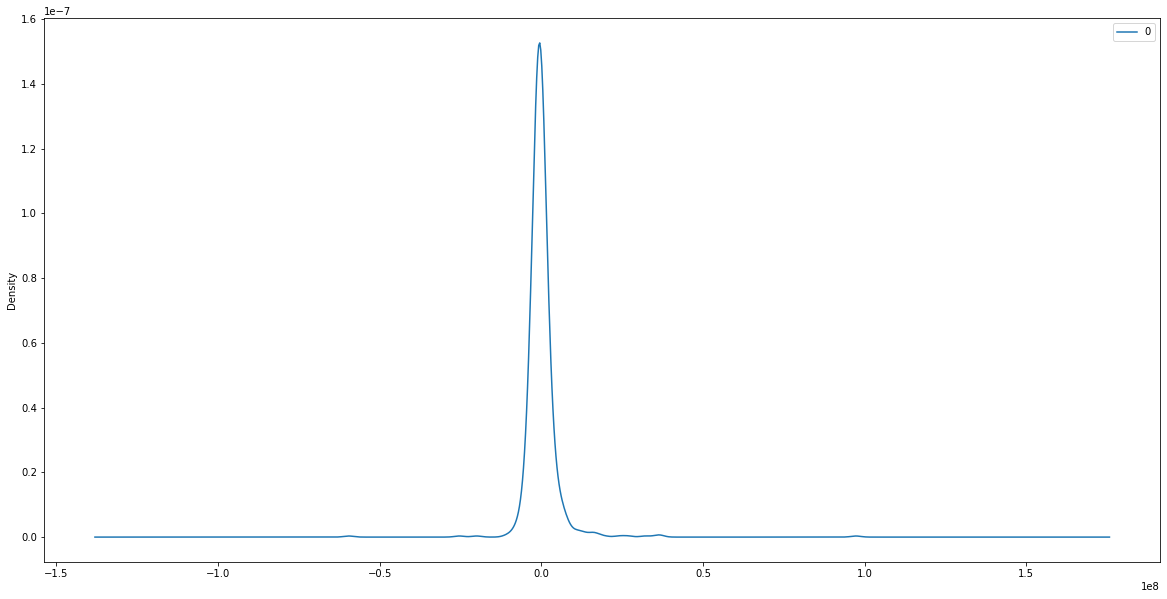

                  0
count  7.690000e+02
mean   8.581068e+04
std    5.847122e+06
min   -5.960334e+07
25%   -1.657541e+06
50%   -4.278211e+05
75%    9.243606e+05
max    9.730065e+07


In [19]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Volume'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

#plotting residual errors
residuals= pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
plt.show()
residuals.plot(kind='kde',figsize=(20,10))
plt.show()
print (residuals.describe())